#Online Food Order Prediction

#Description:
An application to predict whether the customer will order the food again using food delivery application.

#Problem Statement
In this Classification task, building an ML model that will predict if a customer will order food online, based on certain parameters as an input.

#Datasets:
#Input Features:

- Age: The age of the customer
- Gender: The Gender of customer
- Marital Status: marital status of the customer
- Occupation: occupation of the customer
- Monthly Income: monthly income of the customer
- Educational Qualification: educational qualification of the customer
- Family Size: family size of the customer
- Latitude & Longitude: latitude and longitude of the location of the customer
- Pin Code: pin code of the residence of the customer
- Feedback: Feedback of the last order (Positive or Negative)

#Output Feature:
- Output: did the customer order again (Output)

#Technical Stack :
Scikit Learn,
Numpy Array, Pandas, Matplotlib, pylab etc,.

#ML Algorithms Used:
- RandomForestClassifier
- LogisticRegression
- AdaBoostClassifier
- KNeighborsClassifier
- GaussianNB

#Performance Evaluation:
Below metrics are used to calculate the performance of the model:

- Accuracy score
- ROC AUC score, ROC Curve
- Confusion Matrix

#Conclusion:
Selecting the best model for the problem based on the model performance for the datasets.

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
sns.set_theme(style="whitegrid")

#Data Collection
import the dataset for onlinefood orders
link: https://raw.githubusercontent.com/Jaiprakash91194/OnlineFoodDelivery/main/OnlineFoodDelivery_data.csv

In [404]:
url = "https://raw.githubusercontent.com/Jaiprakash91194/OnlineFoodDelivery/main/OnlineFoodDelivery_data.csv"
df = pd.read_csv(url)
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


#Load and Summarize dataset
Check the shape of dataset and check for NAN values

In [405]:
df.shape

(388, 13)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


#Data Cleaning
- Check for Missing/NAN values

In [407]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

#EDA
Perform Exploratory data Analysis to understand about data distribution, dependancy of each feature with target etc.

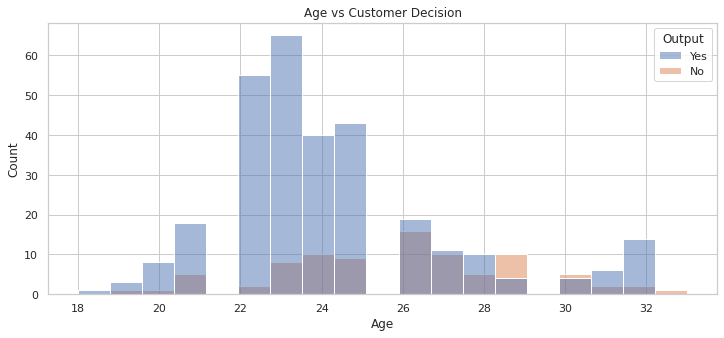

In [408]:
plt.figure(figsize=(12,5))
plt.title("Age vs Customer Decision")
sns.histplot(x="Age", hue="Output", data=df)
plt.show()

We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies.

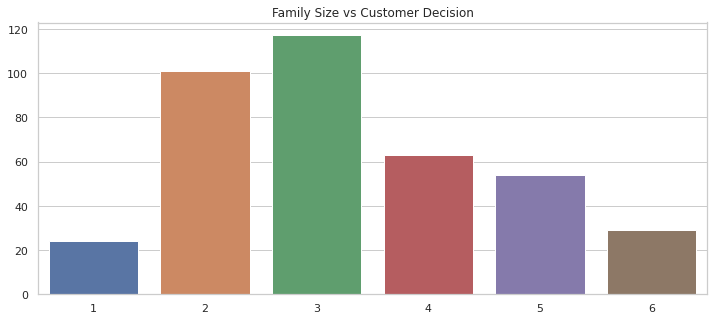

In [409]:
plt.figure(figsize=(12,5))
family_size = df["Family size"].value_counts()
plt.title("Family Size vs Customer Decision")
sns.barplot(x=family_size.index, y=family_size.values)
plt.show()

From above Stats, we see Family with 2-3 members are ordering food mostly. Either they can be bachelors who are staying with their roomates/Couple.

Lets analyse the details of people who ordered the food again.

In [410]:
df_buy_again = df.query("`Output` == 'Yes'")

#Gender vs Online Order
Lets check the relationship between Gender vs Food Order

In [411]:
gender = df_buy_again["Gender"].value_counts()
gen_label = gender.index
gen_value = gender.values
data = go.Pie(labels=gen_label, values=gen_value)
fig = go.Figure(data = data)
fig.update_layout(title_text="Gender vs Online Order", width=400, height=400)
fig.update_traces(hoverinfo="label+percent", textinfo="value")
fig.show()

From above info, we can conclude that Male are ordering more food online comparing to female. Lets commpare the Marital Status of people ordering food online.

In [412]:
marital_status = df_buy_again["Marital Status"].value_counts()
mar_label = marital_status.index
mar_value = marital_status.values

data = go.Pie(labels=mar_label, values = mar_value)
fig = go.Figure(data=data)
fig.update_layout(title_text="Marital Status vs Online Order", width=450, height=450)
fig.update_traces(hoverinfo="value+percent", textinfo="value", textfont_size=20)
fig.show()

From above stats, we see single people are contributing ~76.1% of total orders.

Lets compare the Educational Qualification with online orders

In [413]:
educational_qualification = df_buy_again["Educational Qualifications"].value_counts()
edu_label = educational_qualification.index
edu_values = educational_qualification.values

fig = go.Figure(data=[go.Pie(labels=edu_label, values=edu_values)])
fig.update_layout(title_text = "Educational Qualifications vs Online  Orders", width=500, height=500)
fig.update_traces(hoverinfo="value+percent", textinfo="value")
fig.show()

Post Graduates and Graduates are ordering food online. 

Lets check the monthly income of people who orders food mostly

In [414]:
monthly_income = df_buy_again["Monthly Income"].value_counts()
mon_label = monthly_income.index
mon_values = monthly_income.values

fig = go.Figure(data=[go.Pie(labels=mon_label, values=mon_values)])
fig.update_layout(title_text = "Educational Qualifications vs Online  Orders", width=500, height=500)
fig.update_traces(hoverinfo="value+percent", textinfo="value")
fig.show()

According to the above figure, 54% of the customers don’t fall under any income group. They can be housewives or students.

In [415]:
occupation = df_buy_again["Occupation"].value_counts()
occ_label = occupation.index
occ_values = occupation.values

fig = go.Figure(data=[go.Pie(labels=occ_label, values=occ_values)])
fig.update_layout(title_text = "Educational Qualifications vs Online  Orders", width=500, height=500)
fig.update_traces(hoverinfo="value+percent", textinfo="value")
fig.show()

From above Figures, Students are mostly ordering food online

In [416]:
# for data in ["Marital Status", "Gender", "Family size", "Educational Qualifications","Monthly Income", "Occupation", "Feedback"]:
#   feature = df_buy_again[data].value_counts()
#   labels = feature.index
#   values = feature.values
#   title=data + " vs Food Order Decision"
#   fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
#   fig.update_layout(width=400, height=400, title_text=title)
#   fig.update_traces(hoverinfo="label+percent", textinfo="value", textfont_size=15)
#   fig.show()

#Feature Selection
Based on the analysis of data we can select/reject features based on their correlation with the output.

In [417]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [418]:
print(df["Output"].value_counts())
print(df["Unnamed: 12"].value_counts())

Yes    301
No      87
Name: Output, dtype: int64
Yes    301
No      87
Name: Unnamed: 12, dtype: int64


From above data we see Output and "Unnamed: 12" columns are same. So removing Unnamed: 12

In [419]:
df.drop("Unnamed: 12", axis=1, inplace=True)

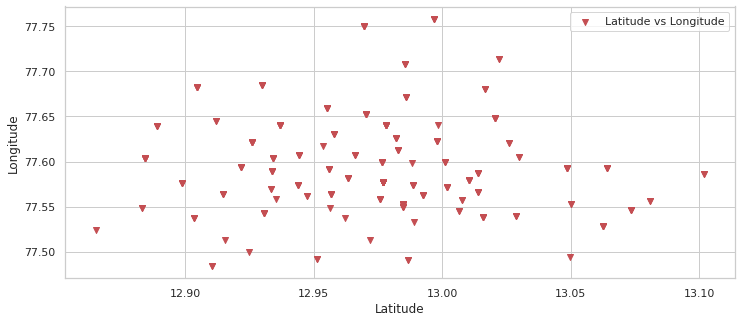

In [420]:
plt.figure(figsize=(12,5))
plt.scatter(df.latitude, df.longitude, label="Latitude vs Longitude", marker="v", color="r")
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()


From above figure, we can conclude that online orders are not dependent on Location (Pincode, Latitude and Longitude). So dropping the Pincode, Latitude and longitude

In [421]:
df.drop(["latitude", "longitude", "Pin code"] , axis=1, inplace=True)

#Encoding the data
Based on inference from above data, we can label the Nominal and Ordinal data into their numeric values for training our Machine Learning Model
- **Nominal Features:** Gender, Marital Status
- **Ordinal Features:** Educational Qualification, Occupation

Will use Label/OneHotEncoding based on the type of data. Also we can map the text values to respective numberic values

Also lets encode the Monthly income to respective Numerical value

In [422]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Marital Status"] = df["Marital Status"].map({"Single": 2, "Married": 1, "Prefer not to say": 0})
df["Occupation"] = df["Occupation"].map({"Student": 1, "Employee": 2, "Self Employeed": 3, "House wife": 4})
df["Educational Qualifications"] = df["Educational Qualifications"].map({"Post Graduate": 1, "Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, "Uneducated": 5})
df["Monthly Income"] = df["Monthly Income"].map({"No Income": 0, "25001 to 50000": 5000, "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, "Below Rs.10000": 10000})
df["Feedback"] = df["Feedback"].map({"Positive": 1, "Negative ": 0})
df["Output"] = df["Output"].map({"Yes": 1, "No": 0})
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Output,Feedback
0,20,0,2,1,0,1,4,1,1
1,24,0,2,1,10000,2,3,1,1
2,22,1,2,1,10000,1,3,1,0
3,22,0,2,1,0,2,6,1,1
4,22,1,2,1,10000,1,4,1,1


#Heatmap
Check if there is strong correlation between independent categorical features

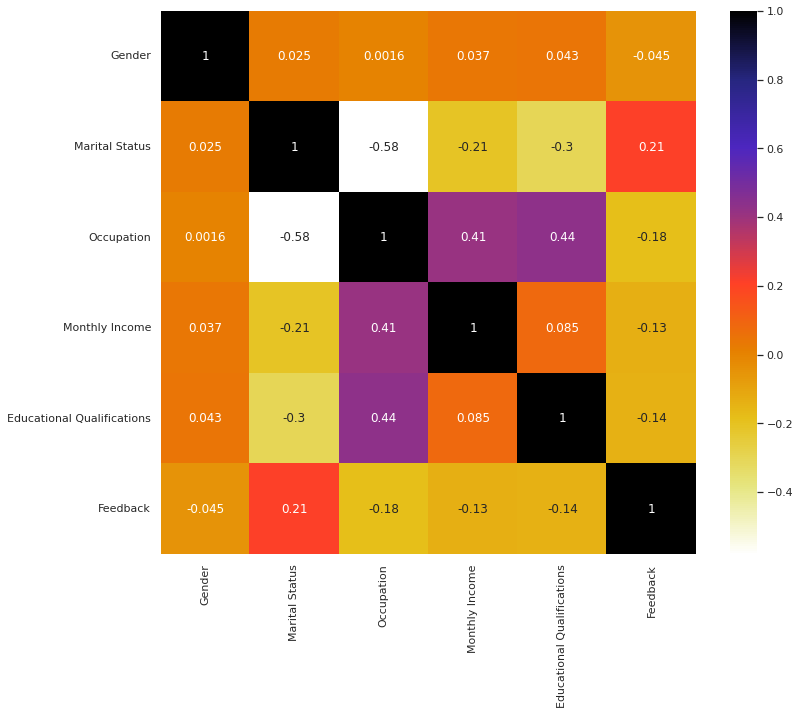

In [423]:
import seaborn as sns
df_corr = df.loc[:,['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']]
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr_map = df_corr.corr()
sns.heatmap(corr_map, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [424]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

From above heatmap figure, we don't see any strong correlation between categorical features. So we are not rejecting any features based on heatmap.

#Split dataset
Split the dataset into Dependent(X) and Independent(Y) feature

In [425]:
X = df.drop("Output", axis=1)
Y = df["Output"]

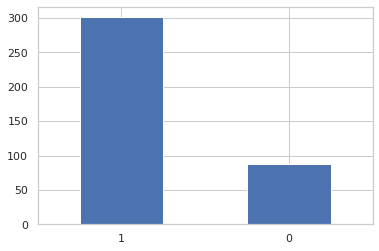

In [426]:
Y.value_counts(sort=True).plot(kind="bar", rot=0)
plt.show()

#Handle Imbalanced Data
Since  the dependent feature is biased towards one class, our ML models might predict output towards one class.

Hence we can perform DownSampling/UpSampling to handle imbalanced datasets.

SMOTE is a technique which performs combination of Up and Down sampling. So that we can avoid the disadvantages of performing Undersampling/Oversampling separate.

In [427]:
from imblearn.combine import SMOTETomek
os_us = SMOTETomek()
x_train_res, y_train_res = os_us.fit_resample(X,Y)

In [428]:
from collections import Counter
print("Original Data: {}\nBalanced Data: {}".format(Counter(Y), Counter(y_train_res)))

Original Data: Counter({1: 301, 0: 87})
Balanced Data: Counter({1: 296, 0: 296})


#Split dataset
Split the dataset into train and test for train our model

In [429]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res)
Counter(y_test), Counter(y_train)

(Counter({0: 82, 1: 66}), Counter({0: 214, 1: 230}))

#Feature Scaling
Apply feature scaling to convert all the features into same scale range

In [430]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
tr_x_train = ss.transform(x_train)
tr_x_test = ss.transform(x_test)
# tr_x_train = x_train
# tr_x_test = x_test

In [431]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
ada_model = AdaBoostClassifier()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
models_accuracy = []

models = [rf_model, lr_model, ada_model, knn_model, nb_model]
models_name = [str(i) for i in models]

pred = []
for model in models:
  model.fit(tr_x_train, y_train)
  y_train_pred = model.predict_proba(tr_x_train)
  train_accuracy = roc_auc_score(y_train, y_train_pred[:,-1]) * 100
  y_test_pred = model.predict_proba(tr_x_test)
  test_accuracy = roc_auc_score(y_test, y_test_pred[:,-1]) * 100
  print("Accuracy of Model: {} for train: {} %, test: {} %".format(str(model), train_accuracy, test_accuracy))
  models_accuracy.append(test_accuracy)
  pred.append(pd.Series(y_test_pred[:,-1]))

df_models_output = pd.concat(pred, axis=1)
df_models_output.columns = models_name
#Create a dataframe of all the model accuracy for a paricular sample
df_models_output["final_prediction"] = df_models_output.mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, df_models_output["final_prediction"])))

Accuracy of Model: RandomForestClassifier() for train: 99.8760666395774 %, test: 95.95343680709534 %
Accuracy of Model: LogisticRegression() for train: 92.10686712718406 %, test: 89.2830746489283 %
Accuracy of Model: AdaBoostClassifier() for train: 94.34579439252336 %, test: 89.2830746489283 %
Accuracy of Model: KNeighborsClassifier() for train: 98.22429906542057 %, test: 92.47043606799704 %
Accuracy of Model: GaussianNB() for train: 91.54815115806582 %, test: 88.1929046563193 %
Ensemble test roc-auc: 0.9425351071692535


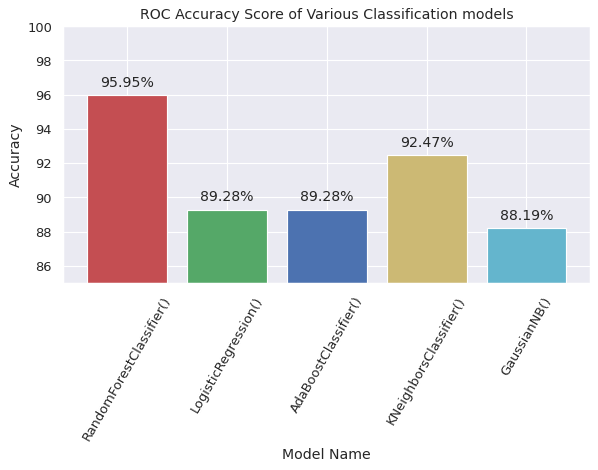

In [432]:
from seaborn import colors
plt.figure(figsize=(8,4), dpi=85)
sns.set_style(style="darkgrid")
plt.bar(models_name, models_accuracy, color=list("rgbyc"))
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("ROC Accuracy Score of Various Classification models")
for index, data in enumerate(models_accuracy):
  plt.text(x=index, y=data+0.5, s=f"{data.round(2)}%", ha="center", fontsize=12)
plt.ylim(85, 100)
plt.xticks(rotation=60)
plt.show()

#Confusion Matrix
Calculate confusion matrix result for the predicted output to check accuracy of our model

In [433]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rf_model.predict(tr_x_test)
# cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(78, 4, 6, 60)

# ROC curve
Calculate ROC curve to find the accuracy of our Classification probelem

In [434]:
fpr, tpr, thresholds = roc_curve(y_test,df_models_output["RandomForestClassifier()"].values)
len(thresholds)

40

In [435]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
  y_pred = np.where(df_models_output["RandomForestClassifier()"].values > thres, 1, 0)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_ls.append(accuracy)

threshold_accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
threshold_accuracy.columns = ["Threshold", "Accuracy"]
threshold_accuracy.sort_values(by="Accuracy", ascending=False, inplace=True)
threshold_accuracy.head()

,Threshold,Accuracy
21,0.47,0.932432
19,0.69,0.925676
25,0.30,0.925676
23,0.33,0.925676
20,0.64,0.918919


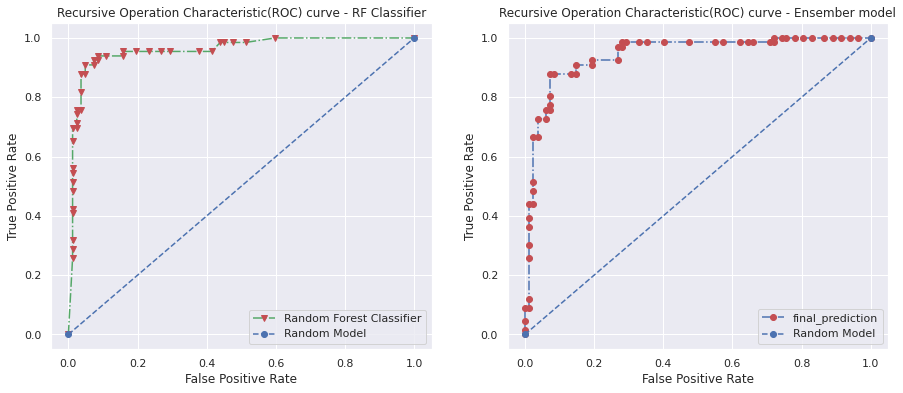

In [436]:
fpr, tpr, threshold = roc_curve(y_test, df_models_output["RandomForestClassifier()"])
fpr_fi, tpr_fi, threshold1 = roc_curve(y_test, df_models_output["final_prediction"])
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, "g-.v", mfc="r", mec="r", label="Random Forest Classifier")
plt.plot([0,1], [0,1], "b--o", label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recursive Operation Characteristic(ROC) curve - RF Classifier")
plt.legend()
plt.subplot(1,2,2)
plt.plot(fpr_fi, tpr_fi, "b-.o", mfc="r", mec="r", label="final_prediction")
plt.plot([0,1], [0,1], "b--o", label="Random Model")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recursive Operation Characteristic(ROC) curve - Ensember model")
plt.show()

Take a sample dataset and test whether our model is predicting the output.

In [437]:
df.query("Output == 0").drop("Output", axis=1).head(2).values

array([[   25,     1,     2,     1,     0,     1,     5,     1],
       [   24,     0,     2,     1, 25000,     1,     3,     1]])

In [438]:
df.query("Output == 1").drop("Output", axis=1).head(2).values

array([[   20,     0,     2,     1,     0,     1,     4,     1],
       [   24,     0,     2,     1, 10000,     2,     3,     1]])

In [439]:
#Sample Data of people ordering food online
features1 = np.array([[   20,     0,     2,     1,     0,     1,     4,     1]])
#Sample Data of people not ordering food again
features2 = np.array([[   27,     0,     0,     2,  5000,     1,     5,     1]])
f1 = ss.transform(features1)
f2 = ss.transform(features2)
print("Finding if the customer will order again: ", rf_model.predict(f1)[0])
print("Finding if the customer will order again: ", rf_model.predict(f2)[0])

Finding if the customer will order again:  1
Finding if the customer will order again:  0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [440]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 0 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h]])
df_features = pd.DataFrame(features, columns=['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income','Educational Qualifications', 'Family size', 'Feedback'])
ss_features = ss.transform(df_features)
output = rf_model.predict(ss_features)[0]
if output == 1:
  print("Customer will order food again")
elif output == 0:
  print("Customer will not order food again")

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 25
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Marital Status of the Customer (1 = Single, 2 = Married, 0 = Not Revealed): 2
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 1
Monthly Income: 0
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
Family Size: 5
Review of the Last Order (1 = Positive, 0 = Negative): 1
Customer will not order food again
